# BASELINE PIPELINE
> Dev log (format < Date > | <Author(s)> )  
> - Created: 28 July 2023 | JiHoon Kim <br>
> - Refactored:  8 Aug 2023 | Roshan Rane <br>
> - Updated:  15 Aug 2023 | JiHoon Kim <br>

![toybrains_baseline_pipeline](https://github.com/RoshanRane/toybrains/assets/39021807/64ffd3d6-71ec-454b-ba14-bf4d603f2ac5)

## import libraries

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pathlib import Path
import sys, os

In [3]:
# add custom imports
from create_toybrains import ToyBrainsData
from utils.baseline import *

## check data generation config
Check the configurations set between Image generation attributes and covariates and labels before  generating the toybrains data

In [4]:
DATA_GEN_CONFIG='lbls-3bin_covs-3_17Jul23.py'

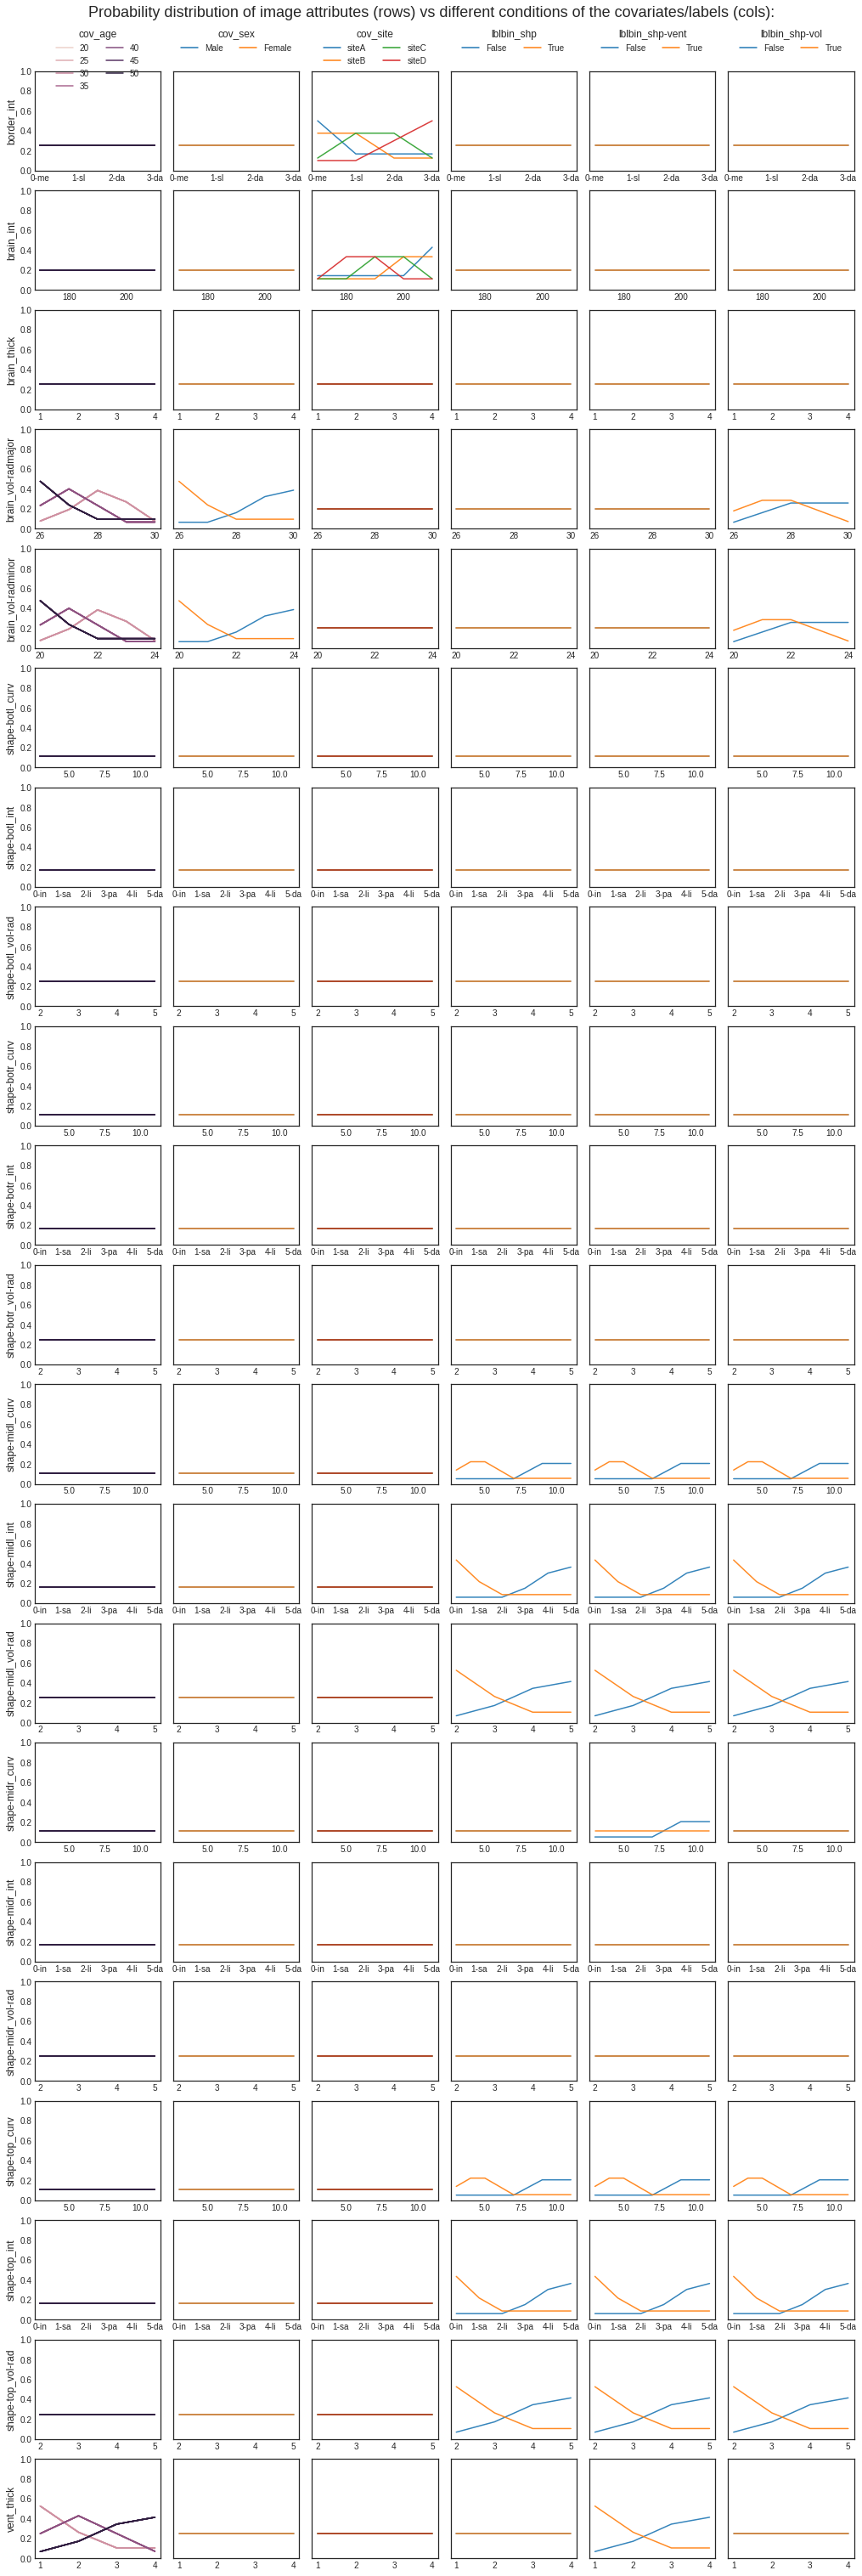

In [5]:
# check config file before generate toybrains it used shapes directory
ToyBrainsData(config=DATA_GEN_CONFIG).show_current_config()
# ToyBrainsData(config='demo').show_current_config()

## generate toybrains dataset
It can be extended as baseline config dict

In [6]:
data_dict = {
    'toybrains300_default': dict(
        n_samples=1000,
        config=None,
        img=True,
        debug=True,
    ),
    'toybrains300_17Jul23': dict(
        n_samples=1000,
        config=DATA_GEN_CONFIG,
        img=True,
        debug=True,
    ),
}

In [7]:
# RUN with generate toybrains
csv_path_list = generate_toybrains_list(data_dict, debug=False)

  0%|          | 1/1000 [00:00<01:45,  9.44it/s]

Generating 1000 synthetic toy brain images:
Generating 1000 synthetic toy brain images:


100%|██████████| 1000/1000 [01:53<00:00,  8.84it/s]


In [8]:
print(csv_path_list)

['dataset/toybrains300_default/toybrains_n1000.csv', 'dataset/toybrains300_17Jul23/toybrains_n1000.csv']


Or you can generate the dataset one by one

In [ ]:
# ! python create_toybrains.py -d --dir 'toybrains30k_17Jul23' -n 30000 -c $DATA_GEN_CONFIG

In [ ]:
# run_toybrains(n_samples=30000, data_dir='toybrains30k', config=DATA_GEN_CONFIG, debug=False)

## run baseline
You can run one by one. If you want you can generate new toybrains dataset using argument img=True

In [ ]:
# DATA_DIR="toybrains30k"
# OUT_DIR='results/toybrains30k'

In [ ]:
# out_path_list = run_baseline(DATA_DIR+"/toybrains_n30000.csv", 
#                              DATA_DIR=DATA_DIR, DATA_N=30000, OUT_DIR=OUT_DIR)

## run baseline pipeline
You can run baseline pipeline using data_dict. The pipeline returns the list of the ouput run.csv. If you already generate the dataset, then please switch img to False.

In [9]:
data_dict = {
    'toybrains30k_default': dict(
        n_samples=30000,
        config=None,
        img=True,
        debug=True,
    ),
    'toybrains30k_17Jul23': dict(
        n_samples=30000,
        config=DATA_GEN_CONFIG,
        img=True,
        debug=True,
    ),
}

In [10]:
out_path_list = run_baseline_pipeline(
    data_dict,
    CV=10,
    N_JOBS=10,
    random_seed=42,
    debug=False
)

Generating 30000 synthetic toy brain images:
Generating 30000 synthetic toy brain images:


100%|██████████| 30000/30000 [52:53<00:00,  9.45it/s]


###############################################################################################
Running Baseline on
DATA DIR: toybrains30k_default
N SAMPLES: 30000
OUTPUT DIR: /ritter/share/projects/JiHoon/toybrains/results/toybrains30k_default/20230815-0248
###############################################################################################
running a total of 180 different settings of [input features] x [output labels] x [cross validation]


100%|████████████████████████████████████████████████████████████████████████████████████████| 180/180 [01:09<00:00,  2.58it/s]


TOTAL RUNTIME: 0:01:12
###############################################################################################
Running Baseline on
DATA DIR: toybrains30k_17Jul23
N SAMPLES: 30000
OUTPUT DIR: /ritter/share/projects/JiHoon/toybrains/results/toybrains30k_17Jul23/20230815-0248
###############################################################################################
running a total of 180 different settings of [input features] x [output labels] x [cross validation]


100%|████████████████████████████████████████████████████████████████████████████████████████| 180/180 [01:04<00:00,  2.80it/s]


TOTAL RUNTIME: 0:01:07
TOTAL PIPELINE RUNTIME: 0:55:18


In [11]:
print(out_path_list)

['/ritter/share/projects/JiHoon/toybrains/results/toybrains30k_default/20230815-0248/run.csv', '/ritter/share/projects/JiHoon/toybrains/results/toybrains30k_17Jul23/20230815-0248/run.csv']


## Visualize results

In [ ]:
# TODO viz with cross validation